# Data Pre Processing

In [14]:
# example of an input csv file containing sensor data
path = '../../Unsupervised_data/FER/Exp_NoExternal#1/NoExternal#1/rpi0.csv'

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [16]:
time_series_data = pd.read_csv(path)
time_series_data = time_series_data.dropna().reset_index().drop('index',axis=1)
time_series_data['datetime'] = pd.to_datetime(time_series_data['timestamp'])
time_series_data.head()

,timestamp,temp-PCB,mag_X,mag_Y,mag_Z,temp-external,light-external,humidity-external,differential_potential_CH1,differential_potential_CH2,RF_power_emission,transpiration,air_pressure,soil_moisture,soil_temperature,datetime
0,2021-04-21 14:22:30,263322.0,-143.0,-290.0,180.0,247205.0,1158619.0,515318.0,276143.0,479927.0,17284.0,4693.0,99935.0,259.0,232.0,2021-04-21 14:22:30
1,2021-04-21 14:22:40,264335.0,-143.0,-283.0,170.0,247795.0,1158619.0,514343.0,292610.0,483292.0,17326.0,4763.0,99930.0,260.0,234.0,2021-04-21 14:22:40
2,2021-04-21 14:22:50,265221.0,-146.0,-292.0,174.0,248497.0,1158619.0,513428.0,309344.0,489078.0,17229.0,4653.0,99933.0,260.0,231.0,2021-04-21 14:22:50
3,2021-04-21 14:23:00,266000.0,-153.0,-284.0,173.0,249425.0,1158619.0,512876.0,267028.0,493860.0,17164.0,4698.0,99934.0,260.0,231.0,2021-04-21 14:23:00
4,2021-04-21 14:23:10,266696.0,-151.0,-284.0,164.0,249585.0,1158619.0,510407.0,277908.0,482842.0,17268.0,4784.0,99936.0,260.0,231.0,2021-04-21 14:23:10


Text(0,0.5,'Temperature (Celzius * 10k)')

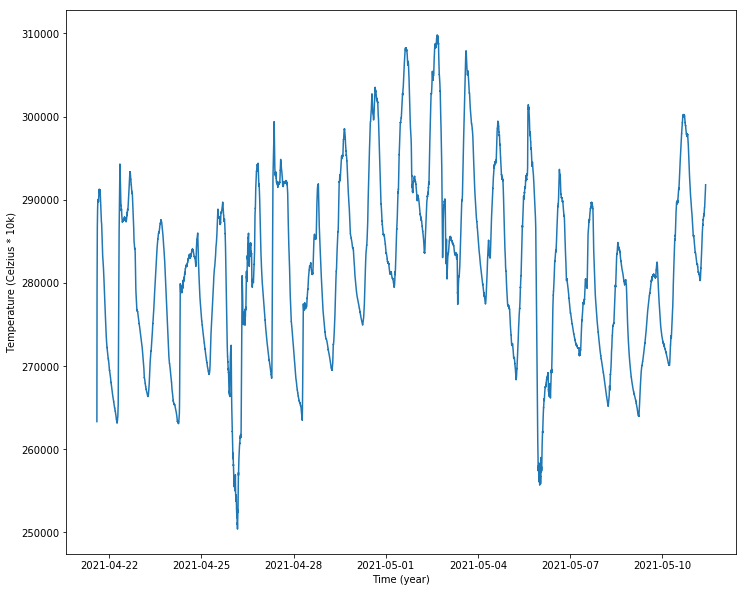

In [21]:
plt.figure(figsize=(12,10))
plt.plot(time_series_data.datetime,time_series_data["temp-PCB"])
plt.xlabel('Time (year)',fontsize=10)
plt.ylabel('Temperature (Celzius * 10k)',fontsize=10)

Text(0,0.5,'Humidity')

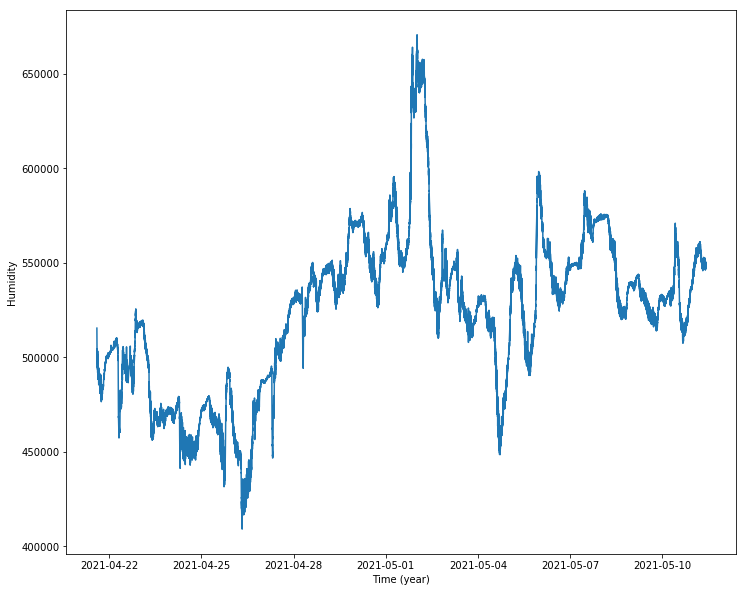

In [23]:
plt.figure(figsize=(12,10))
plt.plot(time_series_data.datetime,time_series_data["humidity-external"])
plt.xlabel('Time (year)',fontsize=10)
plt.ylabel('Humidity',fontsize=10)

In [26]:
plt.figure(figsize=(12,10))
plt.plot(time_series_data.datetime,time_series_data["differential_potential_CH1"])
plt.xlabel('Time (year)',fontsize=10)
plt.ylabel('Differential potential CH1',fontsize=10)

Text(0,0.5,'Differential potential CH1')